Danella Citra Aldarena (5003231003)

Maria Immaculata Dyah Hita Widowati (5003231027)

Ruth Wahyu Sedjati Priyambodo (5003231129)

# Import library

In [5]:
# Imbalanced learning
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    IMBLEARN_AVAILABLE = True
except:
    IMBLEARN_AVAILABLE = False

import warnings
warnings.filterwarnings('ignore')


print("="*80)
print("IMPROVED EMPLOYEE ATTRITION PREDICTION")
print("="*80)
print("\nOPTIMIZATIONS:")
print("  - Overfitting prevention")
print("  - SMOTE balancing" if IMBLEARN_AVAILABLE else "  - Class weights")
print("  - Feature selection")
print("  - Calibration")
print("  - Diverse ensemble")
print("="*80)

IMPROVED EMPLOYEE ATTRITION PREDICTION

OPTIMIZATIONS:
  - Overfitting prevention
  - Class weights
  - Feature selection
  - Calibration
  - Diverse ensemble


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                               ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except:
    XGBOOST_AVAILABLE = False

try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
except:
    LIGHTGBM_AVAILABLE = False

try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except:
    CATBOOST_AVAILABLE = False
import warnings
warnings.filterwarnings('ignore')

In [7]:
test = pd.read_csv('D:/SML_A/test.csv')
train = pd.read_csv('D:/SML_A/train.csv')

In [8]:
print(train.head())

      id  Age     BusinessTravel  DailyRate              Department  \
0  VM684   47      Travel_Rarely       1225                   Sales   
1  ZO618   22      Travel_Rarely        594  Research & Development   
2  JO233   46      Travel_Rarely        406                   Sales   
3  GW565   25      Travel_Rarely        622                   Sales   
4  OZ187   43  Travel_Frequently       1001  Research & Development   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                 2          4     Life Sciences              1   
1                 2          1  Technical Degree              1   
2                 3          1         Marketing              1   
3                13          1           Medical              1   
4                 9          5           Medical              1   

   EmployeeNumber  ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0            1676  ...             80                3                 29   
1             16

In [9]:
print('train:',train.shape)
print(train.info())

train: (1176, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLev

In [10]:
print('test:',test.shape)
print(test.info())

test: (294, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        294 non-null    object
 1   Age                       294 non-null    int64 
 2   BusinessTravel            294 non-null    object
 3   DailyRate                 294 non-null    int64 
 4   Department                294 non-null    object
 5   DistanceFromHome          294 non-null    int64 
 6   Education                 294 non-null    int64 
 7   EducationField            294 non-null    object
 8   EmployeeCount             294 non-null    int64 
 9   EmployeeNumber            294 non-null    int64 
 10  EnvironmentSatisfaction   294 non-null    int64 
 11  Gender                    294 non-null    object
 12  HourlyRate                294 non-null    int64 
 13  JobInvolvement            294 non-null    int64 
 14  JobLevel  

In [11]:
target_counts = train['Attrition'].value_counts()
print(f"\nClass 0: {target_counts[0]} ({target_counts[0]/len(train)*100:.1f}%)")
print(f"Class 1: {target_counts[1]} ({target_counts[1]/len(train)*100:.1f}%)")
print(f"Ratio: {target_counts[0]/target_counts[1]:.1f}:1")


Class 0: 986 (83.8%)
Class 1: 190 (16.2%)
Ratio: 5.2:1


untuk setiap 1 karyawan yang keluar, terdapat sekitar 5 karyawan yang tetap bekerja.

# EDA

### Analisis Target Variable: Attrition

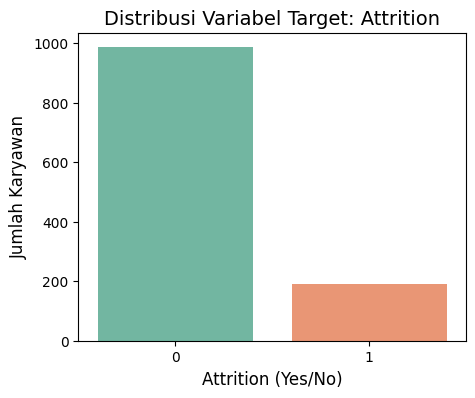

Persentase tiap kelas Attrition (%):
Attrition
0    83.843537
1    16.156463
Name: proportion, dtype: float64

Terdapat class imbalance — kelas minoritas kurang dari 30% dari total data.
Pertimbangkan teknik balancing seperti SMOTE atau class_weight.


In [12]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis variabel target (Attrition)
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=train, palette='Set2')

# Tambahkan label dan judul
plt.title('Distribusi Variabel Target: Attrition', fontsize=14)
plt.xlabel('Attrition (Yes/No)', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.show()

# Hitung proporsi setiap kelas
attrition_counts = train['Attrition'].value_counts(normalize=True) * 100
print("Persentase tiap kelas Attrition (%):")
print(attrition_counts)

# Interpretasi otomatis sederhana
if attrition_counts.min() < 30:
    print("\nTerdapat class imbalance — kelas minoritas kurang dari 30% dari total data.")
    print("Pertimbangkan teknik balancing seperti SMOTE atau class_weight.")
else:
    print("\n Distribusi kelas relatif seimbang.")

Grafik di atas menunjukkan distribusi variabel target Attrition, yang menggambarkan status apakah karyawan tetap bekerja (0) atau keluar dari perusahaan (1). Dari visualisasi tersebut terlihat bahwa sebagian besar karyawan berada pada kategori 0 (tidak keluar), dengan jumlah sekitar 1.000 orang, sedangkan karyawan yang keluar (1) hanya sekitar 200 orang. Hal ini menunjukkan bahwa tingkat attrition di perusahaan relatif rendah, yaitu sekitar 16–20% dari total karyawan.

Distribusi yang tidak seimbang ini menandakan adanya ketidakseimbangan kelas (imbalanced class) dalam data, di mana jumlah karyawan yang bertahan jauh lebih banyak dibandingkan dengan yang keluar. Kondisi ini penting untuk diperhatikan dalam proses pemodelan, karena algoritma machine learning dapat cenderung lebih fokus pada kelas mayoritas. Oleh karena itu, diperlukan penanganan khusus seperti penerapan teknik SMOTE, undersampling, atau penyesuaian class weight agar model dapat memprediksi kedua kelas secara lebih akurat.

### Status Pernikahan vs Attrition

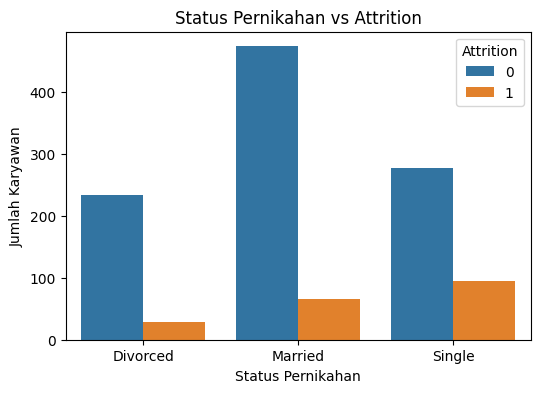

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='MaritalStatus', hue='Attrition')
plt.title('Status Pernikahan vs Attrition')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Karyawan')
plt.show()

Grafik di atas menunjukkan hubungan antara status pernikahan dan attrition (keluarnya karyawan dari perusahaan). Terlihat bahwa karyawan dengan status menikah (Married) memiliki jumlah paling banyak dan cenderung memiliki tingkat attrition yang rendah dibandingkan kelompok lain. Sementara itu, karyawan dengan status lajang (Single) memiliki proporsi attrition yang lebih tinggi dibandingkan dua kelompok lainnya, meskipun jumlah totalnya tidak sebanyak karyawan yang menikah. Adapun karyawan berstatus cerai (Divorced) memiliki jumlah paling sedikit dan juga menunjukkan tingkat attrition yang relatif rendah.

Secara umum, pola ini mengindikasikan bahwa status pernikahan dapat memengaruhi keputusan karyawan untuk tetap bekerja atau keluar dari perusahaan. Karyawan yang sudah menikah cenderung lebih stabil dan memiliki komitmen kerja yang lebih tinggi, sedangkan karyawan yang masih lajang mungkin lebih mudah berpindah pekerjaan karena faktor fleksibilitas dan pencarian peluang baru. Temuan ini dapat menjadi bahan pertimbangan bagi perusahaan untuk merancang strategi retensi yang berbeda sesuai dengan karakteristik demografis karyawan.

### Tingkat Pendidikan vs Attrition

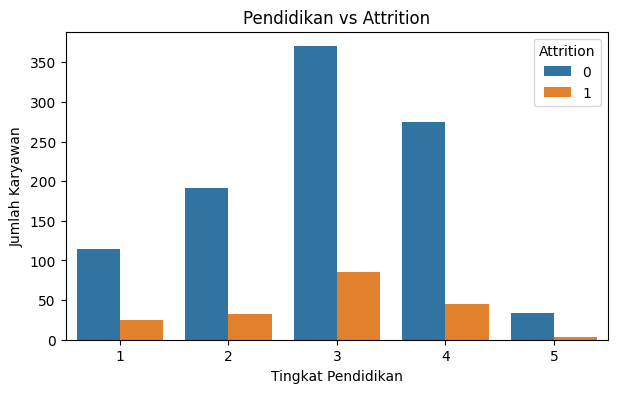

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(data=train, x='Education', hue='Attrition')
plt.title('Pendidikan vs Attrition')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Karyawan')
plt.show()

Grafik di atas menunjukkan hubungan antara tingkat pendidikan dan attrition (keluarnya karyawan dari perusahaan). Terlihat bahwa sebagian besar karyawan memiliki tingkat pendidikan 3 dan 4, dengan mayoritas dari mereka tidak keluar dari perusahaan (attrition = 0). Sementara itu, karyawan dengan tingkat pendidikan 3 juga menjadi kelompok dengan jumlah attrition tertinggi dibandingkan tingkat pendidikan lainnya. Jumlah karyawan dengan tingkat pendidikan 1 dan 5 relatif lebih sedikit, dan keduanya memiliki tingkat attrition yang rendah.

Secara umum, grafik ini mengindikasikan bahwa attrition tidak hanya dipengaruhi oleh tingkat pendidikan, tetapi juga oleh faktor lain seperti posisi pekerjaan, gaji, atau peluang karier. Namun, terlihat bahwa kelompok dengan pendidikan menengah (tingkat 3) memiliki kecenderungan keluar yang lebih tinggi, kemungkinan karena mereka memiliki cukup keterampilan untuk mendapatkan peluang di tempat lain, namun belum mencapai stabilitas karier seperti mereka yang berpendidikan lebih tinggi. Temuan ini dapat membantu perusahaan dalam merancang strategi pengembangan karier dan retensi yang lebih sesuai berdasarkan latar belakang pendidikan karyawan.

### Gender vs Attrition

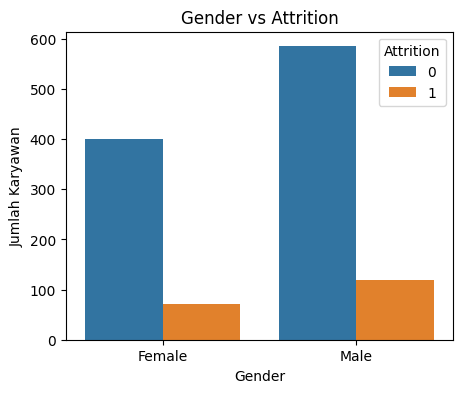

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=train, x='Gender', hue='Attrition')
plt.title('Gender vs Attrition')
plt.xlabel('Gender')
plt.ylabel('Jumlah Karyawan')
plt.show()

Grafik di atas memperlihatkan hubungan antara jenis kelamin (Gender) dan attrition (keluarnya karyawan dari perusahaan). Terlihat bahwa baik pada kelompok laki-laki (Male) maupun perempuan (Female), sebagian besar karyawan memilih untuk tetap bekerja (attrition = 0). Namun, jumlah karyawan laki-laki secara keseluruhan lebih tinggi dibandingkan perempuan. Selain itu, karyawan laki-laki juga memiliki jumlah attrition (1) yang sedikit lebih banyak dibandingkan perempuan.

Secara umum, hal ini menunjukkan bahwa jenis kelamin tidak memiliki pengaruh yang terlalu besar terhadap keputusan karyawan untuk keluar, meskipun laki-laki tampak sedikit lebih rentan terhadap attrition. Faktor lain seperti kepuasan kerja, posisi, atau beban kerja kemungkinan lebih berperan penting dibandingkan faktor gender dalam menentukan tingkat turnover di perusahaan.

### Hubungan antar variabel numerik berdasarkan Attrition

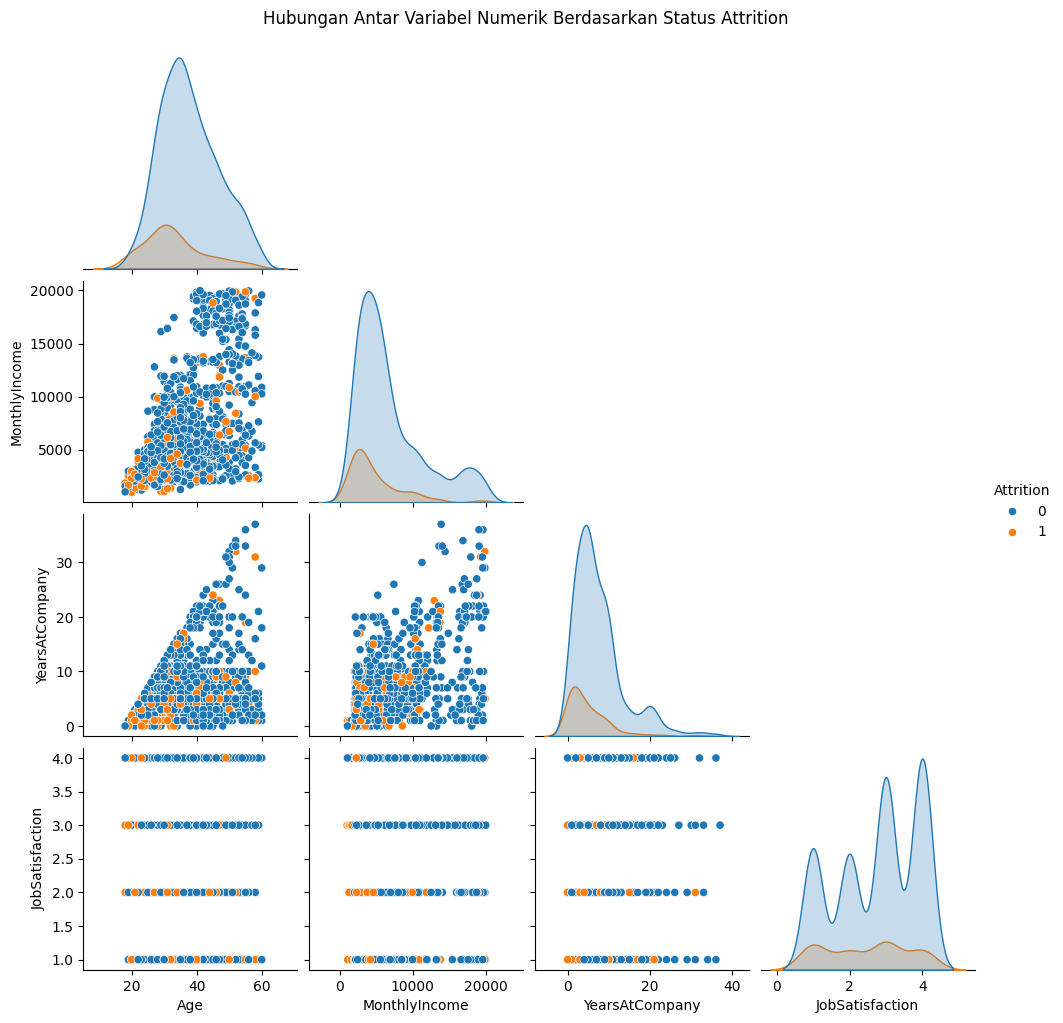

In [16]:
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']

sns.pairplot(train[num_cols + ['Attrition']], hue='Attrition', diag_kind='kde', corner=True)
plt.suptitle('Hubungan Antar Variabel Numerik Berdasarkan Status Attrition', y=1.02)
plt.show()

Grafik di atas menampilkan hubungan antar variabel numerik seperti Age, Monthly Income, Years at Company, dan Job Satisfaction terhadap status attrition (keluar atau tetap bekerja). Terlihat bahwa sebagian besar titik data berwarna biru (attrition = 0) mendominasi pada semua variabel, menandakan bahwa sebagian besar karyawan tetap bekerja. Sementara titik oranye (attrition = 1) tersebar dalam jumlah lebih sedikit, namun cenderung terkonsentrasi pada kelompok dengan usia muda, pendapatan lebih rendah, dan masa kerja yang lebih singkat.

Distribusi ini mengindikasikan bahwa karyawan muda dengan gaji rendah dan pengalaman kerja yang lebih sedikit cenderung memiliki kemungkinan lebih tinggi untuk keluar dari perusahaan. Sebaliknya, karyawan dengan pendapatan tinggi dan masa kerja lebih lama tampak lebih stabil. Untuk variabel Job Satisfaction, tidak tampak perbedaan mencolok antara kelompok yang keluar dan yang bertahan, sehingga faktor kepuasan kerja mungkin tidak menjadi pendorong utama attrition. Secara keseluruhan, grafik ini memberi gambaran bahwa faktor ekonomi (pendapatan) dan pengalaman kerja memiliki pengaruh yang lebih kuat terhadap tingkat attrition dibandingkan faktor usia atau kepuasan kerja semata.

### Hubungan antara Gender × MaritalStatus × Attrition.

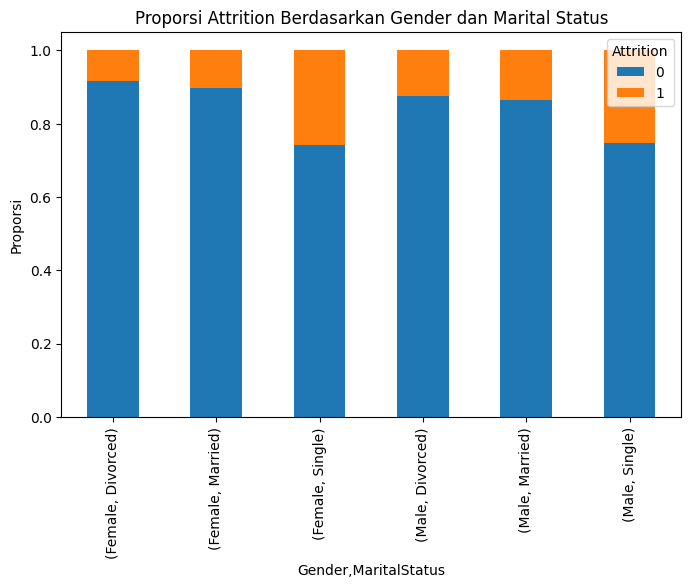

In [17]:
pd.crosstab(index=[train['Gender'], train['MaritalStatus']],
            columns=train['Attrition'], normalize='index').plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Proporsi Attrition Berdasarkan Gender dan Marital Status')
plt.ylabel('Proporsi')
plt.legend(title='Attrition')
plt.show()

Grafik di atas memperlihatkan proporsi attrition berdasarkan kombinasi gender dan status pernikahan. Terlihat bahwa baik pada karyawan laki-laki maupun perempuan, kelompok dengan status single memiliki proporsi attrition (warna oranye) yang lebih tinggi dibandingkan kelompok menikah atau cerai. Sementara itu, baik laki-laki maupun perempuan yang menikah menunjukkan tingkat attrition yang paling rendah, menandakan kecenderungan mereka untuk bertahan lebih lama di perusahaan.

Secara umum, pola ini menunjukkan bahwa status pernikahan memiliki pengaruh yang lebih kuat terhadap attrition dibandingkan gender. Karyawan yang masih lajang cenderung lebih mudah berpindah pekerjaan, kemungkinan karena tanggung jawab keluarga yang lebih ringan dan keinginan mencari pengalaman baru. Sebaliknya, karyawan yang sudah menikah atau pernah menikah cenderung memiliki stabilitas kerja yang lebih tinggi. Temuan ini dapat menjadi dasar bagi perusahaan untuk menyesuaikan strategi retensi karyawan dengan memperhatikan faktor demografis seperti status pernikahan.

### Korelasi antar Variabel Numerik (Age, MonthlyIncome, YearsAtCompany, JobSatisfaction)

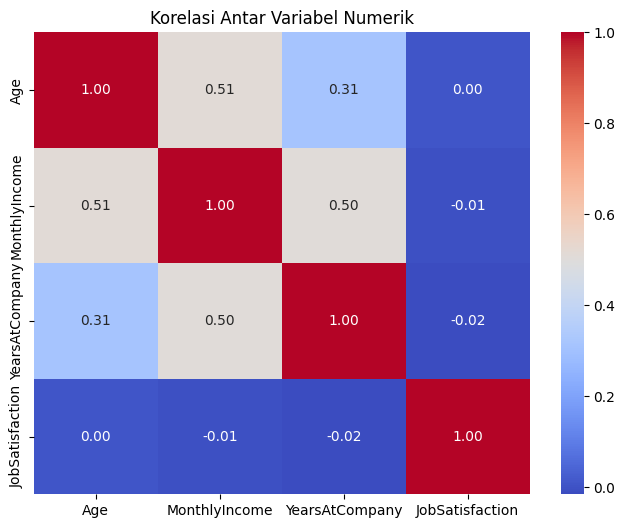

In [18]:
plt.figure(figsize=(8,6))
corr = train[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Berdasarkan heatmap korelasi antar variabel numerik di atas, terlihat bahwa terdapat hubungan positif sedang antara Age dengan MonthlyIncome (r = 0.51) serta antara MonthlyIncome dengan YearsAtCompany (r = 0.50). Artinya, semakin tinggi usia atau semakin lama seseorang bekerja di perusahaan, umumnya pendapatan bulanannya juga meningkat. Selain itu, Age dan YearsAtCompany memiliki korelasi positif rendah (r = 0.31), yang menunjukkan bahwa karyawan yang lebih tua cenderung memiliki masa kerja lebih panjang, meskipun hubungan ini tidak terlalu kuat.

Sementara itu, JobSatisfaction tidak menunjukkan korelasi berarti dengan variabel lain (nilai korelasi mendekati 0), baik terhadap usia, pendapatan, maupun lama bekerja. Hal ini mengindikasikan bahwa tingkat kepuasan kerja karyawan tidak bergantung pada faktor demografis maupun finansial secara langsung, melainkan kemungkinan dipengaruhi oleh aspek lain seperti lingkungan kerja, budaya organisasi, atau hubungan dengan atasan dan rekan kerja.

### Distribusi Income per JobRole Berdasarkan Attrition

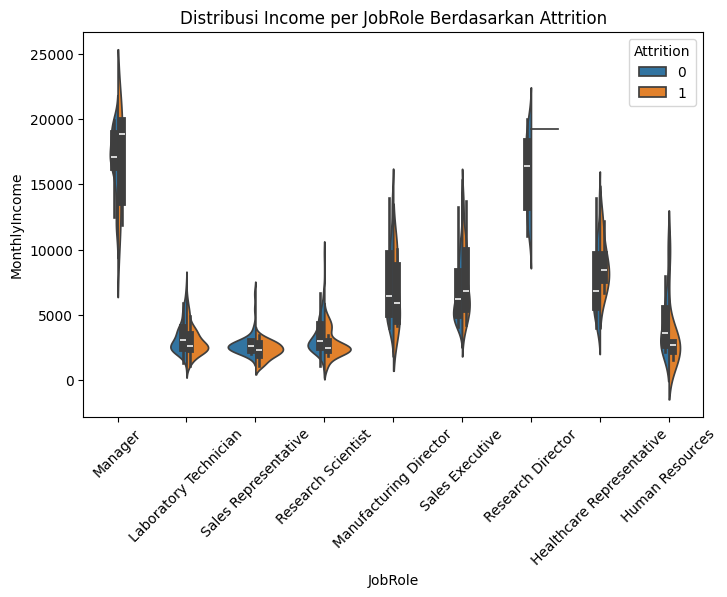

In [19]:
plt.figure(figsize=(8,5))
sns.violinplot(data=train, x='JobRole', y='MonthlyIncome', hue='Attrition', split=True)
plt.title('Distribusi Income per JobRole Berdasarkan Attrition')
plt.xticks(rotation=45)
plt.show()

Grafik violin di atas menunjukkan distribusi pendapatan bulanan (MonthlyIncome) berdasarkan jenis pekerjaan (JobRole) dan status attrition (keluar atau tidak). Secara umum, posisi seperti Manager dan Research Director memiliki pendapatan jauh lebih tinggi dibandingkan peran lain, dengan median gaji yang terlihat di atas 15.000. Sementara itu, posisi seperti Sales Representative, Laboratory Technician, dan Research Scientist memiliki pendapatan yang relatif rendah dengan median di bawah 5.000.

Dari segi attrition, terlihat bahwa distribusi pendapatan antara karyawan yang keluar (warna oranye) dan bertahan (warna biru) tidak berbeda secara signifikan pada sebagian besar peran. Namun, pada beberapa posisi seperti Sales Representative dan Human Resources, karyawan yang keluar cenderung memiliki rentang pendapatan yang sedikit lebih rendah dibandingkan yang bertahan. Hal ini mengindikasikan bahwa tingkat pendapatan mungkin berperan kecil dalam keputusan keluar, tetapi bukan faktor utama; faktor lain seperti kepuasan kerja, peluang karier, atau tekanan pekerjaan kemungkinan memiliki pengaruh lebih besar.

# Pre-Processing

In [20]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1171    False
1172    False
1173    False
1174    False
1175    False
Length: 1176, dtype: bool

In [21]:
train.duplicated().sum()

np.int64(0)

In [22]:
train.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
# memisahkan fitur (X) dan target (y)
X = train.drop(['Attrition', 'id'], axis=1)
y = train['Attrition']
X_test = test.drop(['id'], axis=1)
test_ids = test['id'].copy()

In [24]:
# hapus kolom konstan
constant_cols = [col for col in X.columns if X[col].nunique() == 1]
if constant_cols:
    X = X.drop(constant_cols, axis=1)
    X_test = X_test.drop(constant_cols, axis=1)
    print(f"Removed: {constant_cols}")

Removed: ['EmployeeCount', 'Over18', 'StandardHours']


kolom `EmployeeCount`, `Over18`, dan `StandardHours` memiliki satu nilai unik di seluruh baris.  
Kolom seperti ini tidak memberikan informasi apa pun bagi model, sehingga dihapus dari dataset agar model lebih efisien.

In [25]:
# encoding kategorikal
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Feature Engineering

In [26]:
# feature engineering
def create_features(df):
    df = df.copy()
    df['ExperienceRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
    df['CurrentRoleRatio'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1)
    df['JobHoppingRate'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] + 1)
    df['ManagerStability'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
    df['IncomePerYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)
    df['IsYoung'] = (df['Age'] < 30).astype(int)
    df['ShortTenure'] = (df['YearsAtCompany'] < 2).astype(int)
    df['TimeWithoutPromotion'] = (df['YearsSinceLastPromotion'] > 3).astype(int)
    df['LowJobLevel'] = (df['JobLevel'] <= 1).astype(int)
    df['LongCommute'] = (df['DistanceFromHome'] > 15).astype(int)
    df['PoorWorkLife'] = (df['WorkLifeBalance'] <= 2).astype(int)
    df['OverTime_Binary'] = df['OverTime']
    satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
    df['AvgSatisfaction'] = df[satisfaction_cols].mean(axis=1)
    df['LowSatisfaction'] = (df['AvgSatisfaction'] < 2).astype(int)
    df['HighRisk_Flag'] = ((df['OverTime_Binary'] == 1) &
                           (df['JobSatisfaction'] <= 2) &
                           (df['WorkLifeBalance'] <= 2)).astype(int)
    df['Career_Stagnation'] = ((df['YearsSinceLastPromotion'] > 5) &
                               (df['YearsAtCompany'] > 10)).astype(int)
    df['Income_JobLevel'] = df['MonthlyIncome'] * df['JobLevel']
    df['Age_Experience'] = df['Age'] * df['TotalWorkingYears']
    df['Satisfaction_Performance'] = df['AvgSatisfaction'] * df['PerformanceRating']
    df['AttritionRiskScore'] = (df['LowSatisfaction'] * 2.5 + df['OverTime_Binary'] * 2.0 +
                                df['LongCommute'] * 1.0 + df['TimeWithoutPromotion'] * 2.0 +
                                df['ShortTenure'] * 1.5 + df['JobHoppingRate'] * 12 +
                                df['PoorWorkLife'] * 1.5 + df['LowJobLevel'] * 0.5 +
                                df['HighRisk_Flag'] * 3.0 + df['Career_Stagnation'] * 2.0)
    df['IncomePerAge'] = df['MonthlyIncome'] / (df['Age'] + 1)
    df['PromotionStagnationRatio'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)
    df['TrainingPerYear'] = df['TrainingTimesLastYear'] / (df['YearsAtCompany'] + 1)
    df['Monthly_vs_Daily_Rate'] = df['MonthlyIncome'] / (df['DailyRate'] + 1)

    return df

X_eng = create_features(X)
X_test_eng = create_features(X_test)

print("=== Feature Engineering Comparison ===")
print(f"Original features: {X.shape[1]}")
print(f"Improved version features: {X_eng.shape[1]}")

# fitur baru
print("\nNew features (Improved):", list(set(X_eng.columns) - set(X.columns)))

# nilai fitur baru
print("\nSample improved version:")
display(X_eng.head(3)[['IsYoung']])


=== Feature Engineering Comparison ===
Original features: 31
Improved version features: 55

New features (Improved): ['AvgSatisfaction', 'HighRisk_Flag', 'ExperienceRatio', 'PoorWorkLife', 'Income_JobLevel', 'LowJobLevel', 'CurrentRoleRatio', 'TrainingPerYear', 'Age_Experience', 'LongCommute', 'JobHoppingRate', 'Career_Stagnation', 'IncomePerYear', 'PromotionStagnationRatio', 'Satisfaction_Performance', 'ManagerStability', 'TimeWithoutPromotion', 'IncomePerAge', 'Monthly_vs_Daily_Rate', 'ShortTenure', 'OverTime_Binary', 'LowSatisfaction', 'IsYoung', 'AttritionRiskScore']

Sample improved version:


,IsYoung
0,0
1,1
2,0


jumlah fitur meningkat dari 31 fitur ➡ 55 fitur.

# Feature Selection

random forest, min 25.


TOP 20:
                 feature  importance
      AttritionRiskScore    0.073536
          Age_Experience    0.052724
          JobHoppingRate    0.041741
         Income_JobLevel    0.040687
           MonthlyIncome    0.038546
                     Age    0.037908
       TotalWorkingYears    0.036749
           IncomePerYear    0.029555
               DailyRate    0.026961
                OverTime    0.026755
         AvgSatisfaction    0.026377
   Monthly_vs_Daily_Rate    0.025543
Satisfaction_Performance    0.025139
         OverTime_Binary    0.024850
          EmployeeNumber    0.023789
              HourlyRate    0.023449
        DistanceFromHome    0.023369
        StockOptionLevel    0.023308
             MonthlyRate    0.023107
            IncomePerAge    0.022643

Selected: 25 features


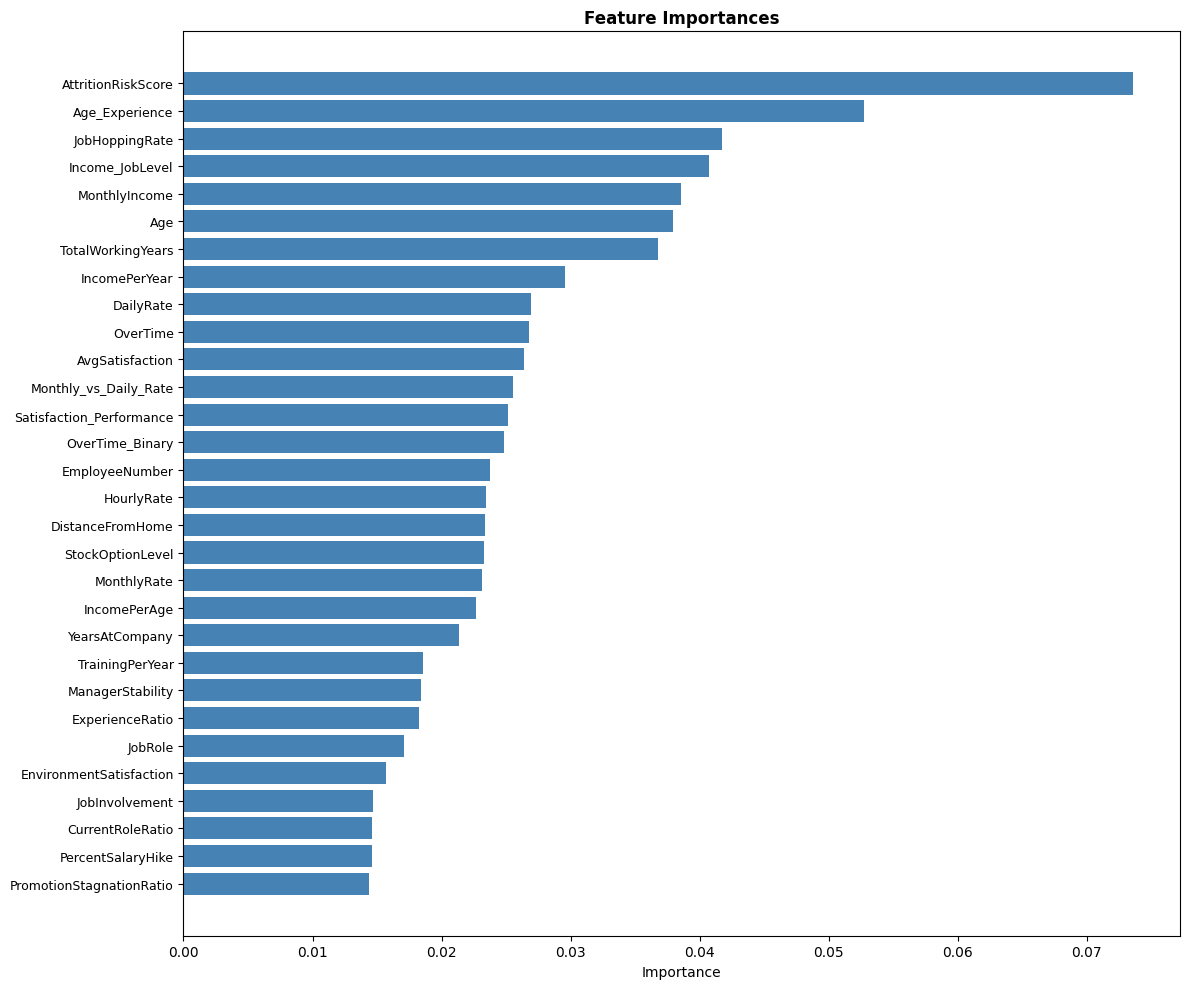

In [27]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_eng, y)

feat_imp = pd.DataFrame({
    'feature': X_eng.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTOP 20:")
print(feat_imp.head(20).to_string(index=False))

N_FEAT = min(25, len(feat_imp))
selected = feat_imp.head(N_FEAT)['feature'].tolist()
X_sel = X_eng[selected].copy()
X_test_sel = X_test_eng[selected].copy()
print(f"\nSelected: {N_FEAT} features")

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
top = feat_imp.head(30)
ax.barh(range(len(top)), top['importance'], color='steelblue')
ax.set_yticks(range(len(top)))
ax.set_yticklabels(top['feature'], fontsize=9)
ax.set_xlabel('Importance')
ax.set_title('Feature Importances', fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('01_features.png', dpi=300, bbox_inches='tight')
plt.show()

CV-aware Incremental Feature Selection

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=2000, solver='saga', penalty='l1', class_weight='balanced', random_state=42)

# Urutkan fitur berdasarkan importance RF
feat_sorted = feat_imp['feature'].tolist()

selected_feats = []
best_cv = 0.0

for f in feat_sorted:
    trial_feats = selected_feats + [f]
    X_trial = X_eng[trial_feats]
    scores = cross_val_score(model, X_trial, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    mean_score = scores.mean()

    # Tambahkan fitur hanya jika CV meningkat
    if mean_score >= best_cv:
        selected_feats.append(f)
        best_cv = mean_score
        print(f"Added: {f}, CV ROC AUC: {mean_score:.4f}")
    else:
        print(f"Skipped: {f}, CV ROC AUC would drop to {mean_score:.4f}")

X_sel = X_eng[selected_feats].copy()
X_test_sel = X_test_eng[selected_feats].copy()


Added: AttritionRiskScore, CV ROC AUC: 0.7488
Skipped: Age_Experience, CV ROC AUC would drop to 0.7459
Added: JobHoppingRate, CV ROC AUC: 0.7499
Skipped: Income_JobLevel, CV ROC AUC would drop to 0.6714
Skipped: MonthlyIncome, CV ROC AUC would drop to 0.6983
Added: Age, CV ROC AUC: 0.7715
Added: TotalWorkingYears, CV ROC AUC: 0.7759
Skipped: IncomePerYear, CV ROC AUC would drop to 0.7583
Skipped: DailyRate, CV ROC AUC would drop to 0.7670
Added: OverTime, CV ROC AUC: 0.7760
Added: AvgSatisfaction, CV ROC AUC: 0.7973
Skipped: Monthly_vs_Daily_Rate, CV ROC AUC would drop to 0.7930
Skipped: Satisfaction_Performance, CV ROC AUC would drop to 0.7971
Added: OverTime_Binary, CV ROC AUC: 0.7973
Skipped: EmployeeNumber, CV ROC AUC would drop to 0.7625
Skipped: HourlyRate, CV ROC AUC would drop to 0.7931
Added: DistanceFromHome, CV ROC AUC: 0.7986
Added: StockOptionLevel, CV ROC AUC: 0.8101
Skipped: MonthlyRate, CV ROC AUC would drop to 0.6518
Skipped: IncomePerAge, CV ROC AUC would drop to 0.79

# Train-Validasi split

memisahkan data menjadi data training (80%) dan validation (20%) dan lakukan standarisasi

In [29]:
X_train, X_val, y_train, y_val = train_test_split(
    X_sel, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}")

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

Train: (940, 18), Val: (236, 18)


# Class balancing

In [30]:
# menyeimbangkan jmlh data antar kelas
if IMBLEARN_AVAILABLE:
    smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)
    under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    X_train_bal, y_train_bal = under.fit_resample(X_train_bal, y_train_bal)
    X_train_bal_sc = scaler.fit_transform(X_train_bal)
    print(f"Balanced: {X_train.shape[0]} -> {X_train_bal.shape[0]}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].bar(['No', 'Yes'], y_train.value_counts().sort_index(), color=['#2ecc71', '#e74c3c'])
    axes[0].set_title('Original', fontweight='bold')
    axes[1].bar(['No', 'Yes'], pd.Series(y_train_bal).value_counts().sort_index(), color=['#2ecc71', '#e74c3c'])
    axes[1].set_title('After SMOTE', fontweight='bold')
    plt.tight_layout()
    plt.savefig('02_balancing.png', dpi=300, bbox_inches='tight')
    plt.close()
else:
    X_train_bal, y_train_bal = X_train.copy(), y_train.copy()
    X_train_bal_sc = X_train_sc.copy()
    print("Using class_weight='balanced'")

Using class_weight='balanced'


# Analisis

In [31]:
# ============================================================================
# MODEL TRAINING
# ============================================================================
print("\nSECTION 7: MODEL TRAINING")
print("="*80)

results = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def train_model(name, model, use_scaled=False):
    print(f"\n{name}...")
    X_tr = X_train_bal_sc if (use_scaled and IMBLEARN_AVAILABLE) else X_train_sc if use_scaled else X_train_bal if IMBLEARN_AVAILABLE else X_train
    y_tr = y_train_bal if IMBLEARN_AVAILABLE else y_train
    X_v = X_val_sc if use_scaled else X_val

    model.fit(X_tr, y_tr)
    y_tr_pred = model.predict_proba(X_tr)[:, 1]
    y_v_pred = model.predict_proba(X_v)[:, 1]

    tr_score = roc_auc_score(y_tr, y_tr_pred)
    v_score = roc_auc_score(y_val, y_v_pred)

    try:
        cv_scores = cross_val_score(model, X_train_sc if use_scaled else X_train, y_train,
                                    cv=cv, scoring='roc_auc', n_jobs=-1)
        cv_mean, cv_std = cv_scores.mean(), cv_scores.std()
    except:
        cv_mean, cv_std = v_score, 0.0

    gap = tr_score - v_score
    status = 'GOOD' if gap < 0.05 else 'WARN' if gap < 0.10 else 'BAD'

    print(f"  Train: {tr_score:.4f}, Val: {v_score:.4f}, CV: {cv_mean:.4f}, Gap: {gap:.4f} ({status})")

    results[name] = {
        'model': model, 'train': tr_score, 'val': v_score, 'cv': cv_mean,
        'cv_std': cv_std, 'gap': gap, 'pred': y_v_pred, 'scaled': use_scaled
    }

print("\nLINEAR MODELS:")
train_model("Logistic L2", LogisticRegression(max_iter=2000, C=0.05, penalty='l2', random_state=42, class_weight='balanced'), True)
train_model("Logistic L1", LogisticRegression(max_iter=2000, C=0.1, penalty='l1', solver='saga', random_state=42, class_weight='balanced'), True)

print("\nTREE MODELS:")
train_model("Random Forest", RandomForestClassifier(n_estimators=500, max_depth=7, min_samples_split=30, min_samples_leaf=15,
                                                     max_features='sqrt', random_state=42, n_jobs=-1, class_weight='balanced'), False)
train_model("Extra Trees", ExtraTreesClassifier(n_estimators=500, max_depth=7, min_samples_split=30, min_samples_leaf=15,
                                                 max_features='sqrt', random_state=42, n_jobs=-1, class_weight='balanced'), False)
train_model("Gradient Boosting", GradientBoostingClassifier(n_estimators=200, learning_rate=0.03, max_depth=4,
                                                             min_samples_split=30, min_samples_leaf=15, subsample=0.7, random_state=42), False)

if XGBOOST_AVAILABLE:
    train_model("XGBoost", XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=5, min_child_weight=5,
                                         subsample=0.7, colsample_bytree=0.7, gamma=1, reg_alpha=0.5, reg_lambda=1.0,
                                         random_state=42, eval_metric='logloss', use_label_encoder=False), False)

if LIGHTGBM_AVAILABLE:
    train_model("LightGBM", LGBMClassifier(n_estimators=300, learning_rate=0.03, max_depth=5, num_leaves=20,
                                           min_child_samples=30, subsample=0.7, colsample_bytree=0.7,
                                           reg_alpha=0.5, reg_lambda=1.0, random_state=42, verbose=-1), False)

if CATBOOST_AVAILABLE:
    train_model("CatBoost", CatBoostClassifier(iterations=300, learning_rate=0.03, depth=5, l2_leaf_reg=3.0,
                                               random_state=42, verbose=False), False)

# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("\n\nSECTION 8: COMPARISON")
print("="*80)

df_res = pd.DataFrame({
    'Model': list(results.keys()),
    'Train': [v['train'] for v in results.values()],
    'Val': [v['val'] for v in results.values()],
    'CV': [v['cv'] for v in results.values()],
    'Gap': [v['gap'] for v in results.values()]
}).sort_values('CV', ascending=False)

print("\n" + df_res.to_string(index=False))
print(f"\nBest CV: {df_res['CV'].max():.4f}, Best Val: {df_res['Val'].max():.4f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1
ax = axes[0, 0]
sorted_df = df_res.sort_values('CV')
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in sorted_df['Gap']]
ax.barh(range(len(sorted_df)), sorted_df['CV'], color=colors)
ax.set_yticks(range(len(sorted_df)))
ax.set_yticklabels(sorted_df['Model'], fontsize=9)
ax.set_title('CV Scores', fontweight='bold')

# Plot 2
ax = axes[0, 1]
x = np.arange(len(df_res))
w = 0.35
ax.bar(x - w/2, df_res['Train'], w, label='Train', color='lightgreen')
ax.bar(x + w/2, df_res['Val'], w, label='Val', color='steelblue')
ax.set_xticks(x)
ax.set_xticklabels(df_res['Model'], rotation=45, ha='right', fontsize=8)
ax.set_title('Train vs Val', fontweight='bold')
ax.legend()

# Plot 3
ax = axes[1, 0]
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in df_res['Gap']]
ax.barh(range(len(df_res)), df_res['Gap'], color=colors)
ax.set_yticks(range(len(df_res)))
ax.set_yticklabels(df_res['Model'], fontsize=9)
ax.set_title('Overfitting Gap', fontweight='bold')
ax.axvline(x=0.05, color='orange', linestyle='--')
ax.axvline(x=0.10, color='red', linestyle='--')

# Plot 4
ax = axes[1, 1]
ax.scatter(df_res['Gap'], df_res['CV'], s=100, alpha=0.6)
for _, row in df_res.iterrows():
    ax.annotate(row['Model'], (row['Gap'], row['CV']), fontsize=7, ha='right')
ax.set_xlabel('Gap')
ax.set_ylabel('CV')
ax.set_title('Generalization', fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# CALIBRATION
# ============================================================================
print("\n\nSECTION 9: CALIBRATION")
print("="*80)

top3 = df_res.nsmallest(3, 'Gap')['Model'].tolist()
print(f"Calibrating: {top3}")

calib = {}
for name in top3:
    print(f"\n{name}...")
    r = results[name]
    X_tr = X_train_bal_sc if (r['scaled'] and IMBLEARN_AVAILABLE) else X_train_sc if r['scaled'] else X_train_bal if IMBLEARN_AVAILABLE else X_train
    y_tr = y_train_bal if IMBLEARN_AVAILABLE else y_train
    X_v = X_val_sc if r['scaled'] else X_val

    clf = CalibratedClassifierCV(r['model'], method='isotonic', cv=3)
    clf.fit(X_tr, y_tr)
    pred = clf.predict_proba(X_v)[:, 1]
    score = roc_auc_score(y_val, pred)

    print(f"  Original: {r['val']:.4f}, Calibrated: {score:.4f}, Gain: {score - r['val']:+.4f}")

    calib[f"{name} (Cal)"] = {'model': clf, 'val': score, 'pred': pred, 'scaled': r['scaled']}




SECTION 7: MODEL TRAINING

LINEAR MODELS:

Logistic L2...
  Train: 0.8470, Val: 0.8207, CV: 0.8266, Gap: 0.0263 (GOOD)

Logistic L1...
  Train: 0.8442, Val: 0.8192, CV: 0.8231, Gap: 0.0250 (GOOD)

TREE MODELS:

Random Forest...
  Train: 0.9276, Val: 0.7968, CV: 0.8045, Gap: 0.1308 (BAD)

Extra Trees...
  Train: 0.8845, Val: 0.8276, CV: 0.8020, Gap: 0.0569 (WARN)

Gradient Boosting...
  Train: 0.9795, Val: 0.8037, CV: 0.8160, Gap: 0.1758 (BAD)


SECTION 8: COMPARISON

            Model    Train      Val       CV      Gap
      Logistic L2 0.847048 0.820707 0.826574 0.026341
      Logistic L1 0.844234 0.819245 0.823094 0.024989
Gradient Boosting 0.979537 0.803695 0.815984 0.175842
    Random Forest 0.927615 0.796784 0.804485 0.130831
      Extra Trees 0.884476 0.827618 0.801958 0.056858

Best CV: 0.8266, Best Val: 0.8276


SECTION 9: CALIBRATION
Calibrating: ['Logistic L1', 'Logistic L2', 'Extra Trees']

Logistic L1...
  Original: 0.8192, Calibrated: 0.8125, Gain: -0.0067

Logistic L2..

In [32]:

# ============================================================================
# CALIBRATION
# ============================================================================
print("\n\nSECTION 9: CALIBRATION")
print("="*80)

top3 = df_res.nsmallest(3, 'Gap')['Model'].tolist()
print(f"Calibrating: {top3}")

calib = {}
for name in top3:
    print(f"\n{name}...")
    r = results[name]
    X_tr = X_train_bal_sc if (r['scaled'] and IMBLEARN_AVAILABLE) else X_train_sc if r['scaled'] else X_train_bal if IMBLEARN_AVAILABLE else X_train
    y_tr = y_train_bal if IMBLEARN_AVAILABLE else y_train
    X_v = X_val_sc if r['scaled'] else X_val

    clf = CalibratedClassifierCV(r['model'], method='isotonic', cv=3)
    clf.fit(X_tr, y_tr)
    pred = clf.predict_proba(X_v)[:, 1]
    score = roc_auc_score(y_val, pred)

    print(f"  Original: {r['val']:.4f}, Calibrated: {score:.4f}, Gain: {score - r['val']:+.4f}")

    calib[f"{name} (Cal)"] = {'model': clf, 'val': score, 'pred': pred, 'scaled': r['scaled']}

# ============================================================================
# ENSEMBLE
# ============================================================================
print("\n\nSECTION 10: ENSEMBLE")
print("="*80)

linear = [n for n in results.keys() if 'Logistic' in n]
trees = [n for n in results.keys() if n not in linear]

best_lin = max(linear, key=lambda x: results[x]['cv'])
best_tree = max(trees, key=lambda x: results[x]['cv'])

print(f"Linear: {best_lin}, Tree: {best_tree}")

ens_models = [best_lin, best_tree]
for c in calib.keys():
    if c.replace(' (Cal)', '') in ens_models:
        ens_models.append(c)

print(f"Ensemble: {ens_models}")

preds, wts = [], []
for m in ens_models:
    if m in results:
        preds.append(results[m]['pred'])
        wts.append(results[m]['cv'])
    elif m in calib:
        preds.append(calib[m]['pred'])
        wts.append(calib[m]['val'])

wts = np.array(wts) / np.sum(wts)

pred_avg = np.mean(preds, axis=0)
pred_wt = np.average(preds, axis=0, weights=wts)

score_avg = roc_auc_score(y_val, pred_avg)
score_wt = roc_auc_score(y_val, pred_wt)

print(f"\nAverage: {score_avg:.4f}, Weighted: {score_wt:.4f}")

best = pred_wt if score_wt > score_avg else pred_avg
best_score = max(score_avg, score_wt)

print(f"Best: {best_score:.4f}, Gain: {best_score - df_res['Val'].max():+.4f}")

# ROC
fig, ax = plt.subplots(figsize=(12, 8))
for name in df_res.head(5)['Model'].tolist():
    pred = results[name]['pred']
    fpr, tpr, _ = roc_curve(y_val, pred)
    ax.plot(fpr, tpr, lw=2, label=f'{name} ({auc(fpr, tpr):.3f})')
fpr, tpr, _ = roc_curve(y_val, best)
ax.plot(fpr, tpr, lw=3, linestyle='--', color='red', label=f'Ensemble ({auc(fpr, tpr):.3f})')
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC Curves', fontweight='bold')
ax.legend(loc="lower right")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('04_roc.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# TEST PREDICTIONS
# ============================================================================
print("\n\nSECTION 11: TEST PREDICTIONS")
print("="*80)

test_preds = {}
for m in ens_models:
    if m in results:
        model, scaled = results[m]['model'], results[m]['scaled']
    elif m in calib:
        model, scaled = calib[m]['model'], calib[m]['scaled']
    else:
        continue

    X_t = scaler.transform(X_test_sel) if scaled else X_test_sel
    pred = model.predict_proba(X_t)[:, 1]
    test_preds[m] = pred
    print(f"{m}: {pred.mean():.4f}")

final = np.average(list(test_preds.values()), axis=0, weights=wts)
print(f"\nFinal: {final.mean():.4f}, Train: {y.mean():.4f}, Diff: {abs(final.mean() - y.mean()):.4f}")

# ============================================================================
# SUBMISSION
# ============================================================================
print("\n\nSECTION 12: SUBMISSION")
print("="*80)

sub = pd.DataFrame({'id': test_ids, 'Attrition': final})
sub.to_csv('submission.csv', index=False)
print("Created: submission.csv")
print(f"\nMean: {sub['Attrition'].mean():.4f}, Std: {sub['Attrition'].std():.4f}")
print(f"Min: {sub['Attrition'].min():.4f}, Max: {sub['Attrition'].max():.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(sub['Attrition'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=sub['Attrition'].mean(), color='red', linestyle='--', label='Test')
axes[0].axvline(x=y.mean(), color='green', linestyle='--', label='Train')
axes[0].set_title('Distribution', fontweight='bold')
axes[0].legend()
axes[1].boxplot([sub['Attrition']])
axes[1].axhline(y=y.mean(), color='green', linestyle='--')
axes[1].set_title('Boxplot', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('05_submission.png', dpi=300, bbox_inches='tight')
plt.close()

print("\n" + sub.head(20).to_string(index=False))

print("\n" + "="*80)
print("DONE!")
print("="*80)
print(f"CV: {df_res['CV'].max():.4f}, Val: {df_res['Val'].max():.4f}, Ensemble: {best_score:.4f}")
print("Files: submission.csv + 5 PNG visualizations")
print("="*80)



SECTION 9: CALIBRATION
Calibrating: ['Logistic L1', 'Logistic L2', 'Extra Trees']

Logistic L1...
  Original: 0.8192, Calibrated: 0.8125, Gain: -0.0067

Logistic L2...
  Original: 0.8207, Calibrated: 0.8196, Gain: -0.0011

Extra Trees...
  Original: 0.8276, Calibrated: 0.8351, Gain: +0.0075


SECTION 10: ENSEMBLE
Linear: Logistic L2, Tree: Gradient Boosting
Ensemble: ['Logistic L2', 'Gradient Boosting', 'Logistic L2 (Cal)']

Average: 0.8216, Weighted: 0.8215
Best: 0.8216, Gain: -0.0060


SECTION 11: TEST PREDICTIONS
Logistic L2: 0.3889
Gradient Boosting: 0.1535
Logistic L2 (Cal): 0.1664

Final: 0.2368, Train: 0.1616, Diff: 0.0753


SECTION 12: SUBMISSION
Created: submission.csv

Mean: 0.2368, Std: 0.2090
Min: 0.0117, Max: 0.9612

   id  Attrition
CM617   0.529213
PJ010   0.061832
GJ831   0.281729
JD352   0.050992
WZ263   0.525857
OD346   0.220390
GF698   0.066929
JK198   0.110908
SP276   0.051216
OP259   0.849579
CR707   0.315025
HO168   0.232425
CX146   0.116768
NV992   0.355532
FB7

In [40]:
# ============================================================================
# SECTION 11: BEST MODEL EVALUATION
# ============================================================================
print("\n\nSECTION 13: BEST MODEL EVALUATION")
print("="*80)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns
import joblib
import os

# --- Gunakan hasil ensemble (best prediction dari SECTION 10) ---
y_true = y_val
y_prob = best
y_pred = (y_prob >= 0.5).astype(int)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Ensemble Model", fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("06_bestmodel_confusion.png", dpi=300, bbox_inches='tight')
plt.close()

# --- ROC Curve & AUC ---
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title("ROC Curve - Ensemble Model", fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("07_bestmodel_ROC.png", dpi=300, bbox_inches='tight')
plt.close()

# --- Precision-Recall Curve ---
prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, color='green', lw=2, label=f"PR curve (AUC = {pr_auc:.4f})")
plt.title("Precision-Recall Curve - Ensemble Model", fontweight='bold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig("08_bestmodel_PR.png", dpi=300, bbox_inches='tight')
plt.close()

print(f"\nROC-AUC Score : {roc_auc:.4f}")
print(f"PR-AUC Score  : {pr_auc:.4f}")

# --- Save Ensemble Model ---
os.makedirs("../model", exist_ok=True)

# Untuk dokumentasi, simpan model kalibrasi/ensemble yang digunakan
model_dict = {
    'ens_models': ens_models,
    'weights': wts,
    'best_predictions': best,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc
}

model_path = "D:/SML_A/model/ensemble_L2_GB_Cal_v1.pkl"
joblib.dump(model_dict, model_path)
print(f"\n✅ Ensemble model saved at: {model_path}")



SECTION 13: BEST MODEL EVALUATION

Classification Report:
              precision    recall  f1-score   support

           0     0.9158    0.9343    0.9250       198
           1     0.6176    0.5526    0.5833        38

    accuracy                         0.8729       236
   macro avg     0.7667    0.7435    0.7542       236
weighted avg     0.8678    0.8729    0.8700       236


ROC-AUC Score : 0.8216
PR-AUC Score  : 0.6284

✅ Ensemble model saved at: D:/SML_A/model/ensemble_L2_GB_Cal_v1.pkl




SECTION 14: VISUALIZATIONS


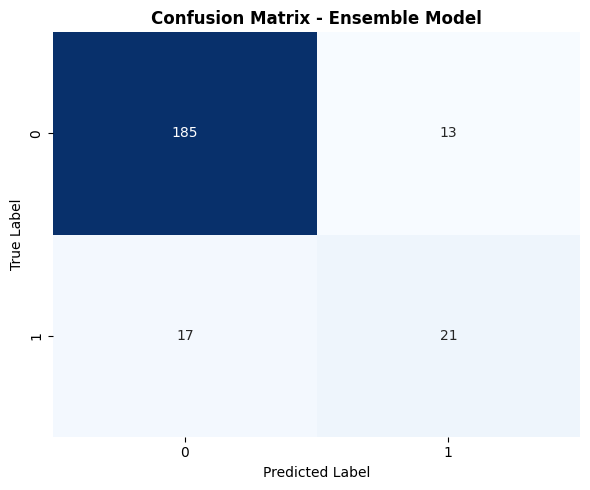

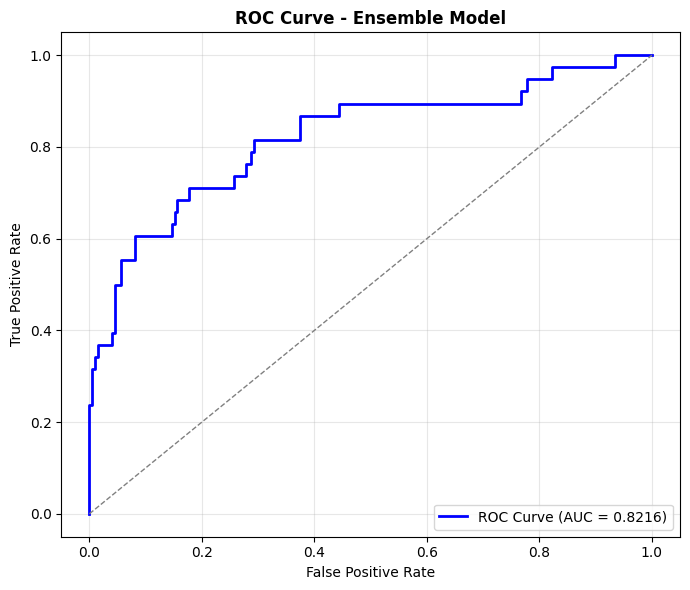

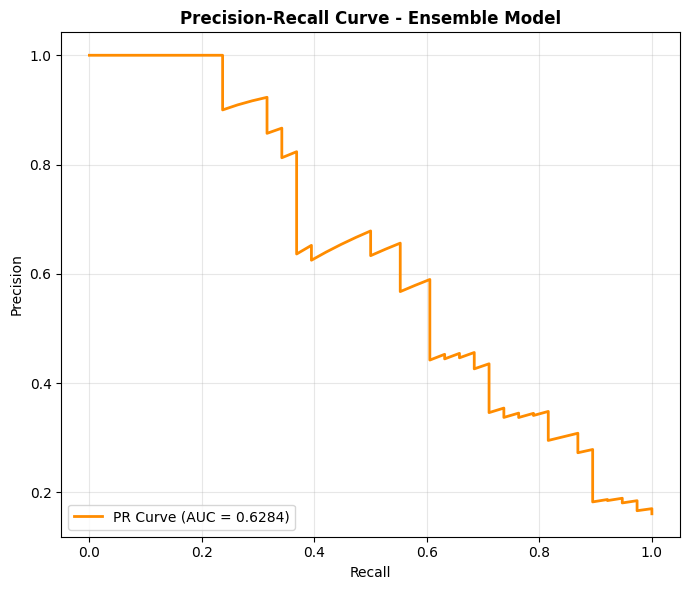


✅ Confusion Matrix, ROC, dan PR Curve berhasil dibuat dan disimpan.


In [42]:
# ============================================================================
# SECTION 14: BEST MODEL VISUALIZATIONS
# ============================================================================
print("\n\nSECTION 14: VISUALIZATIONS")
print("="*80)

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Ensemble Model", fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("06_bestmodel_confusion.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 2. ROC Curve ---
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.title("ROC Curve - Ensemble Model", fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("07_bestmodel_ROC.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 3. Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.title("Precision-Recall Curve - Ensemble Model", fontweight='bold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("08_bestmodel_PR.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Confusion Matrix, ROC, dan PR Curve berhasil dibuat dan disimpan.")


## Interpretasi Model

Model terbaik yang dihasilkan merupakan model ensemble yang menggabungkan Logistic Regression dengan regularisasi L2, Gradient Boosting, dan Logistic L2 yang telah dikalibrasi. Model ini menunjukkan performa yang cukup baik dengan akurasi 87,29%, yang berarti sebagian besar prediksi sudah sesuai dengan kondisi aktual. Untuk kelas karyawan yang keluar (attrition = 1), precision sebesar 0.6176 menunjukkan bahwa sekitar 62% prediksi keluar benar-benar tepat, sementara recall sebesar 0.5526 menunjukkan bahwa model mampu mengenali sekitar 55% dari seluruh karyawan yang benar-benar keluar. Nilai F1-score sebesar 0.5833 menandakan keseimbangan yang moderat antara ketepatan dan kelengkapan deteksi. Selain itu, ROC-AUC sebesar 0.8216 dan PR-AUC sebesar 0.6284 menunjukkan bahwa model memiliki kemampuan diskriminasi yang baik dalam membedakan karyawan yang bertahan dan keluar, meskipun datanya tidak seimbang.

## Penerapan Model 

Secara bisnis, hasil prediksi model ini juga memberikan gambaran nilai finansial yang signifikan. Berdasarkan confusion matrix, terdapat 21 karyawan yang berhasil diprediksi dengan benar akan keluar (True Positive), 17 karyawan yang keluar tetapi tidak terdeteksi (False Negative), serta 13 karyawan yang sebenarnya bertahan tetapi diprediksi keluar (False Positive). Dengan asumsi bahwa biaya kehilangan satu karyawan akibat turnover adalah Rp25 juta, maka potensi kerugian yang berhasil dihindari dari 21 True Positive adalah sebesar 21 × Rp25 juta = Rp525 juta. Sementara itu, 17 karyawan yang keluar tetapi tidak terdeteksi menimbulkan kerugian sebesar 17 × Rp25 juta = Rp425 juta. Di sisi lain, untuk 13 karyawan yang salah diprediksi keluar, diasumsikan perusahaan mengeluarkan biaya retensi sebesar Rp5 juta per orang, sehingga totalnya mencapai 13 × Rp5 juta = Rp65 juta. Setelah dikalkulasi secara keseluruhan, model ini memberikan dampak finansial bersih sebesar Rp35 juta (Rp525 juta – Rp425 juta – Rp65 juta).

Hasil ini menunjukkan bahwa model tidak hanya memiliki performa statistik yang solid, tetapi juga berdampak positif terhadap efisiensi biaya perusahaan. Dengan menggunakan model ini, perusahaan dapat mengantisipasi potensi turnover dengan lebih tepat dan menyalurkan strategi retensi secara lebih efektif, sehingga mampu mengoptimalkan anggaran dan menjaga stabilitas tenaga kerja.